#Importing the Essential Libraries
In this section, we have imported the essential libraries required for k-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

#Importing the Dataset
In this section, we have used the dataset 'load_digits()' provided by the library sklearn.datasets.

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

# Loading the dataset into the Dataframe
In this section, we have loaded the dataset into the dataframe (to store the data in tabular form).

In [3]:
df = pd.DataFrame(X)
df['target'] = y

# Print some info about the DataFrame
"Shape of the DataFrame:", df.shape
df.head() # Prints the first 5 rows
"\nNumber of unique target values:", df['target'].nunique()

# Separate features for clustering
X_for_clustering = df.drop('target', axis=1)

Shape of the DataFrame: (1797, 65)
First few rows of the DataFrame:
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

Number of unique target values: 10


# k-Means Clustering Algorithm
In this section, we have implemented the algorithm for the k-Means Clustering.

In [4]:
n_clusters = 10 # k = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X_for_clustering)
df['cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

#Data Visualization
In this section, we have visulaized data through scatter plot.

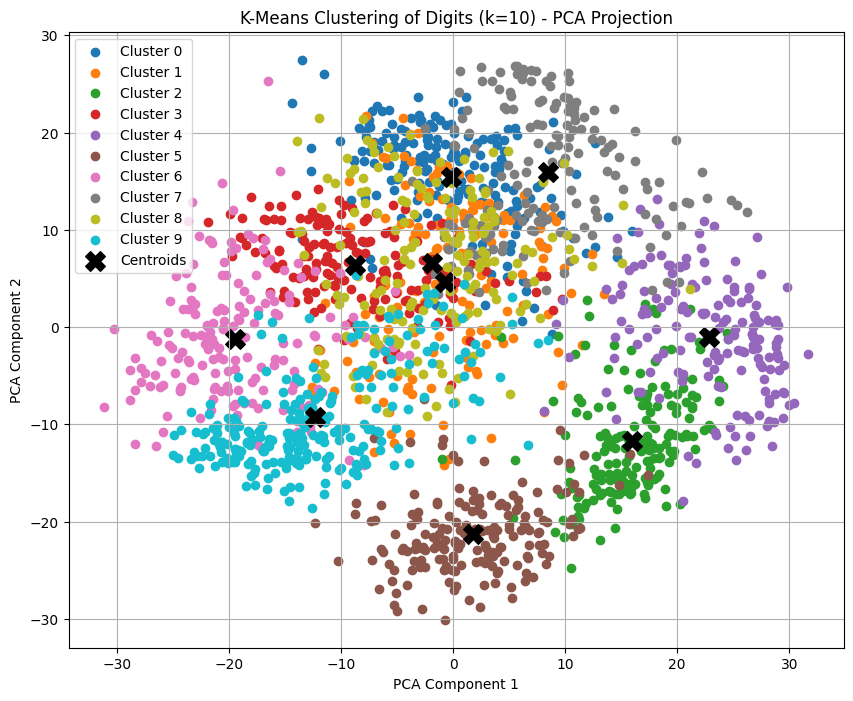

In [5]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_for_clustering)
df_reduced = pd.DataFrame(X_reduced, columns=['PCA1', 'PCA2'])
df_reduced['cluster'] = df['cluster']

plt.figure(figsize=(10, 8))
for i in range(n_clusters):
    subset = df_reduced[df_reduced['cluster'] == i]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {i}')

plt.scatter(pca.transform(cluster_centers)[:, 0], pca.transform(cluster_centers)[:, 1],
            marker='X', s=200, color='black', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'K-Means Clustering of Digits (k={n_clusters}) - PCA Projection')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 4. Report the clustering quality using Silhouette Score
silhouette_avg = silhouette_score(X_for_clustering, df['cluster'])
print(f"\nSilhouette Score for k={n_clusters}: {silhouette_avg:.4f}")

# Optional: Report Inertia
print(f"Inertia for k={n_clusters}: {kmeans.inertia_:.4f}")


Silhouette Score for k=10: 0.1765
Inertia for k=10: 1187766.2293
